<div style="background-color:#F0EFED ;color:#EB3D6B;padding:20px;border:1px solid #3184BB;text-align:center;">
<p><font size="14" color="#EB3D6B" face="Lora"><i>Customer Segmentation(retail Domain)</i></font> </p>
</div>

# Problem Statement :
* The Aim here is to do customer segmentation i.e Analyze and obtain nice insights on the customer behaviour based on the given historical data provided.

In [103]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [104]:
df = pd.read_excel(r"C:\Users\psath\Downloads\retail.xlsx")

In [105]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [107]:
# Customer ID feature is having missing values 
# Description feature is having missing values

In [108]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Clean the data

In [109]:
# Missing values
round(df.isna().sum()/len(df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [110]:
# Customer ID feature is having 24.93 percent of data missing 
# they must be remved in-order to avoid future problems in our algorithms

In [111]:
df = df.dropna()
df.reset_index(inplace = True)

In [112]:
df.drop(labels='index',axis = 1, inplace = True)

In [113]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [114]:
# Missing values
round(df.isna().sum()/len(df)*100,2) # The missing values are being removed.

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [115]:
df['Monetary'] = df.Quantity*df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [116]:
max_date = max(df.InvoiceDate)
max_date

Timestamp('2011-12-09 12:50:00')

In [117]:
df['Diff']= max_date - df.InvoiceDate
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


# Prepare the Data For Modeling (WIthout Treating Outliers)

### Feature Extractions from the given historical data
> Method - RMF(Recency , Monetary , Frequency )

In [118]:
# monetary
amount = df.groupby(['CustomerID'])['Monetary'].sum()

In [119]:
amount = amount.reset_index()
amount.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [120]:
# Frequency
# count function gives the frequency of each customer
frequency = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [121]:
# Recency
# When was the last time the customer has visited the store
recency = df.groupby(['CustomerID'])['Diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [122]:
df1 = pd.merge(amount,frequency, on='CustomerID', how = 'inner')
df1.head()

,CustomerID,Monetary,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1


In [123]:
rmf_df = pd.merge(df1,recency, on='CustomerID', how='inner')
rmf_df.columns = ['CustomerID','Monetary','Frequency','Recency']
rmf_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,7,1 days 20:58:00
2,12348.0,1797.24,4,74 days 23:37:00
3,12349.0,1757.55,1,18 days 02:59:00
4,12350.0,334.40,1,309 days 20:49:00


In [124]:
import datetime
from datetime import date,time

In [125]:
# The recency feature is in timedelta dtype 
# Lets extract only no of days.

In [126]:
rmf_df['Recency']= rmf_df['Recency'].dt.days
rmf_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309


**NOTE:**
* Recency: Number of days since last purchase
* Frequency: Number of tracsactions
* Monetary: Total amount of transactions (revenue contributed)

## Feature Transformation - Standardization

In [127]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [128]:
rmf_df1 = rmf_df.iloc[:,1:4]

In [129]:
# Object creation of the class
scaler = StandardScaler()

# Apply fit_transform
rmf_df_scaled = scaler.fit_transform(rmf_df1)
rmf_df_scaled.shape

(4372, 3)

In [130]:
rmf_df_scaled = pd.DataFrame(rmf_df_scaled)
rmf_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rmf_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.231001,-0.329362,2.322023
1,0.293432,0.206102,-0.893733
2,-0.012316,-0.115176,-0.169196
3,-0.017146,-0.436455,-0.725005
4,-0.190312,-0.436455,2.163220


## Model Building

In [131]:
from sklearn.cluster import KMeans

In [132]:
# k-means with some arbitrary k i.e randomly choosing the no of clusters
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rmf_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [133]:
kmeans.labels_

array([1, 3, 3, ..., 3, 3, 3])

In [134]:
# assign the labels to the dataframe
rmf_df['cluster_id'] = kmeans.labels_
rmf_df.head()

,CustomerID,Monetary,Frequency,Recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,7,1,3
2,12348.0,1797.24,4,74,3
3,12349.0,1757.55,1,18,3
4,12350.0,334.40,1,309,1


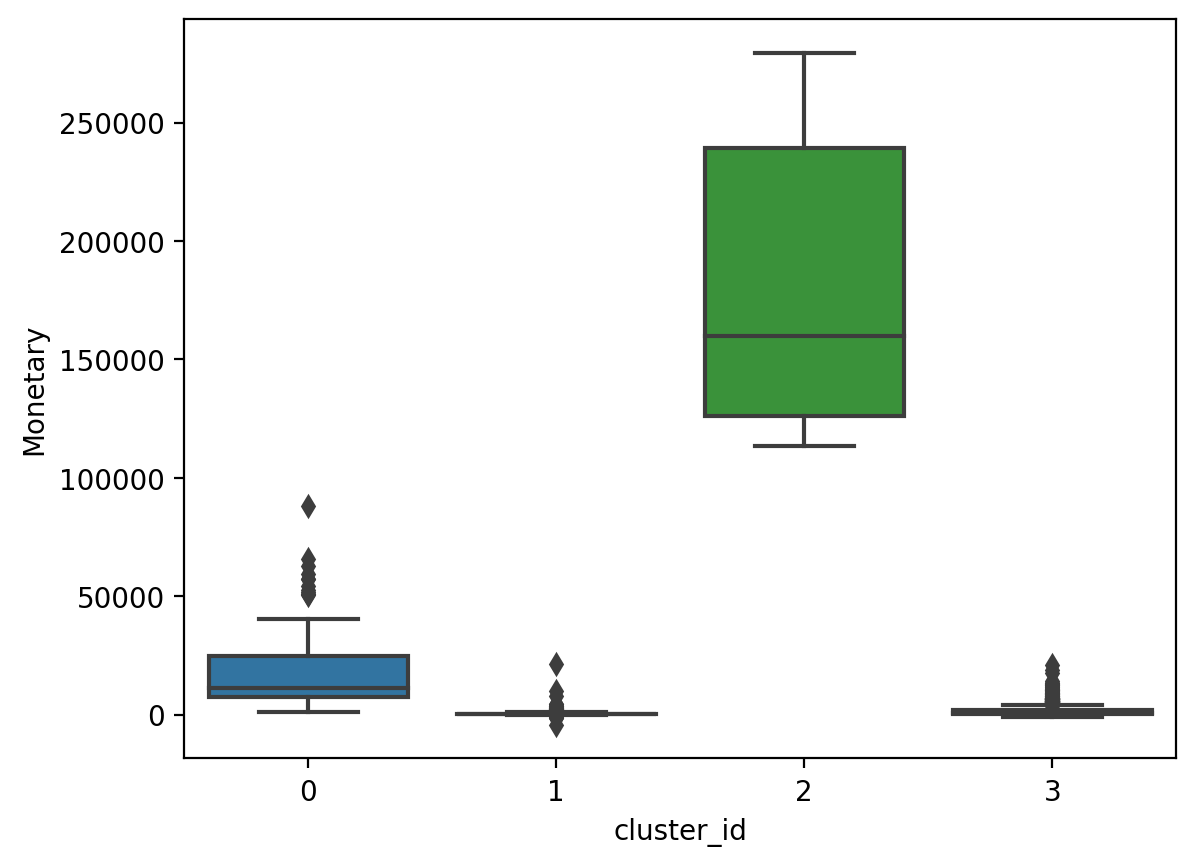

In [135]:
# plot 
sns.boxplot(x='cluster_id', y='Monetary', data=rmf_df);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i> Cluster <code>2</code> represents high Monetary customers.</i><br>
    * <i> Cluster <code>1</code> and <code>3</code> has high overlap.</i><br>
    * <i> Cluster <code>0</code> represents moderate Monetary customers.</i><br>
    </div>

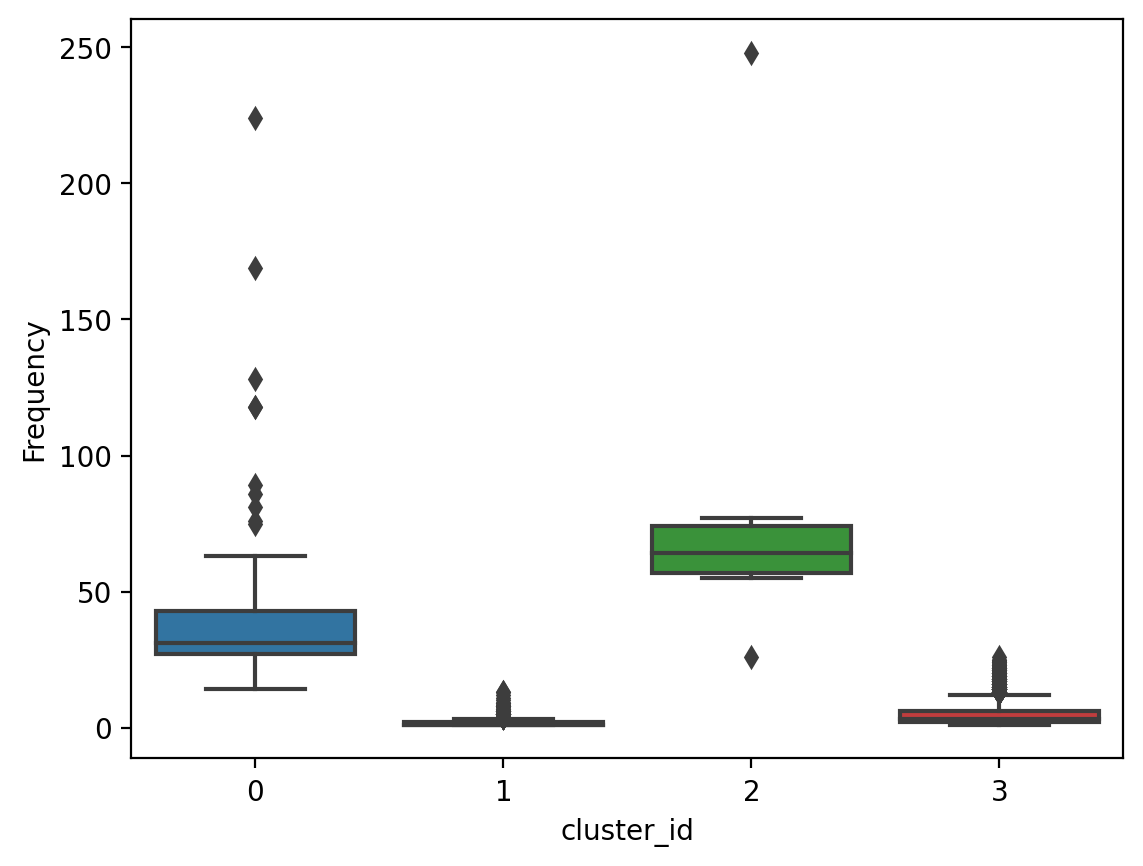

In [136]:
sns.boxplot(x='cluster_id', y='Frequency', data=rmf_df);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i> Cluster <code>2</code> represents moderate - High Frequency customers.</i><br>
    * <i> Cluster <code>1</code> and <code>3</code> has high overlap.</i><br>
    * <i> Cluster <code>0</code> represents moderate Frequency customers.</i><br>
    </div>

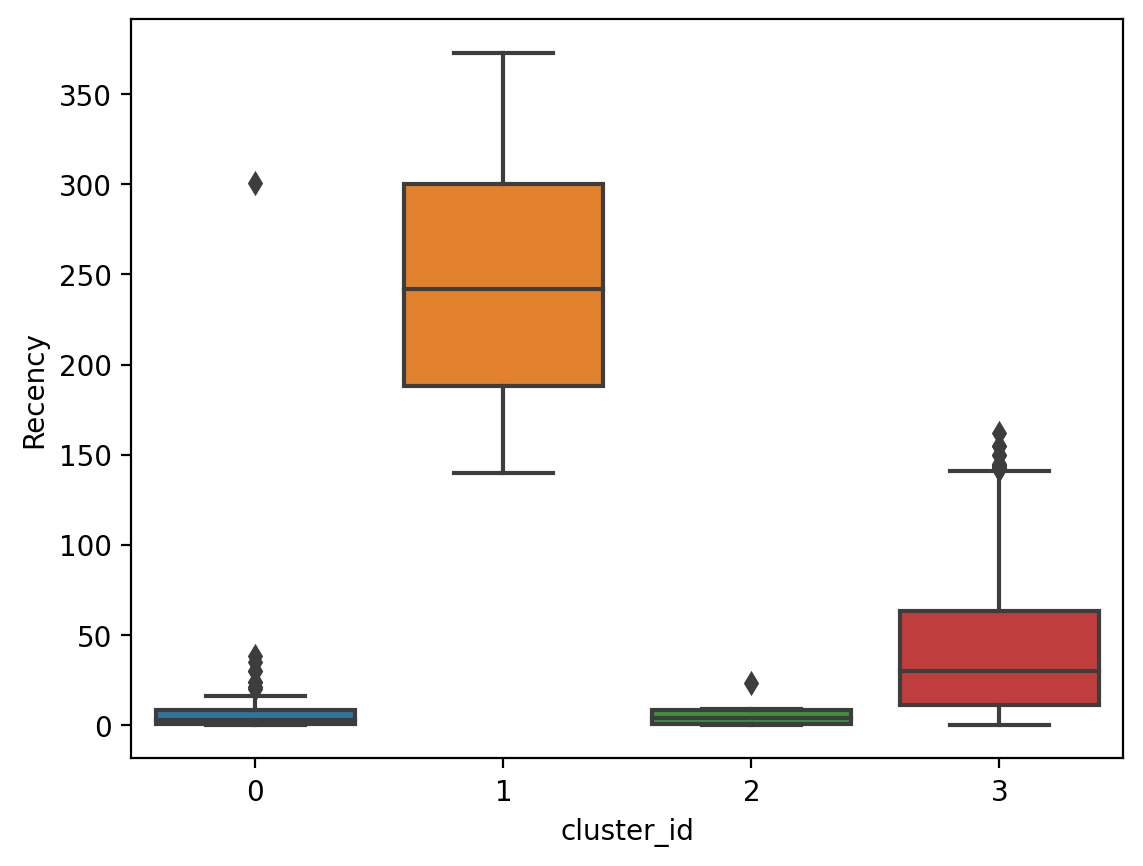

In [137]:
sns.boxplot(x='cluster_id', y='Recency', data=rmf_df);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i> Cluster <code>2</code> and <code>0</code> represents least Recency customers but are overlaping.</i><br>
    * <i> Cluster <code>3</code> has Moderate Recency Customers.</i><br>
    * <i> Cluster <code>1</code> represents  High Recency customers.</i><br>
    </div>

## ♦ Overall Observations
<div class="alert alert-block alert-info">
    * <i>From the above observations we were able to identify that cluster 2 customers are high frequent, monetary and    Least Recency</i><br>
    * <i>But apart from that we were unable to figure out all the clusters Behaviour by using Arbitrary initialization of no of clusters </i><br>

## Finding the Optimal Number of Clusters

## Elbow Curve Method

KMeans(max_iter=50, n_clusters=2)

KMeans(max_iter=50, n_clusters=3)

KMeans(max_iter=50, n_clusters=4)

KMeans(max_iter=50, n_clusters=5)

KMeans(max_iter=50, n_clusters=6)

KMeans(max_iter=50, n_clusters=7)

KMeans(max_iter=50)

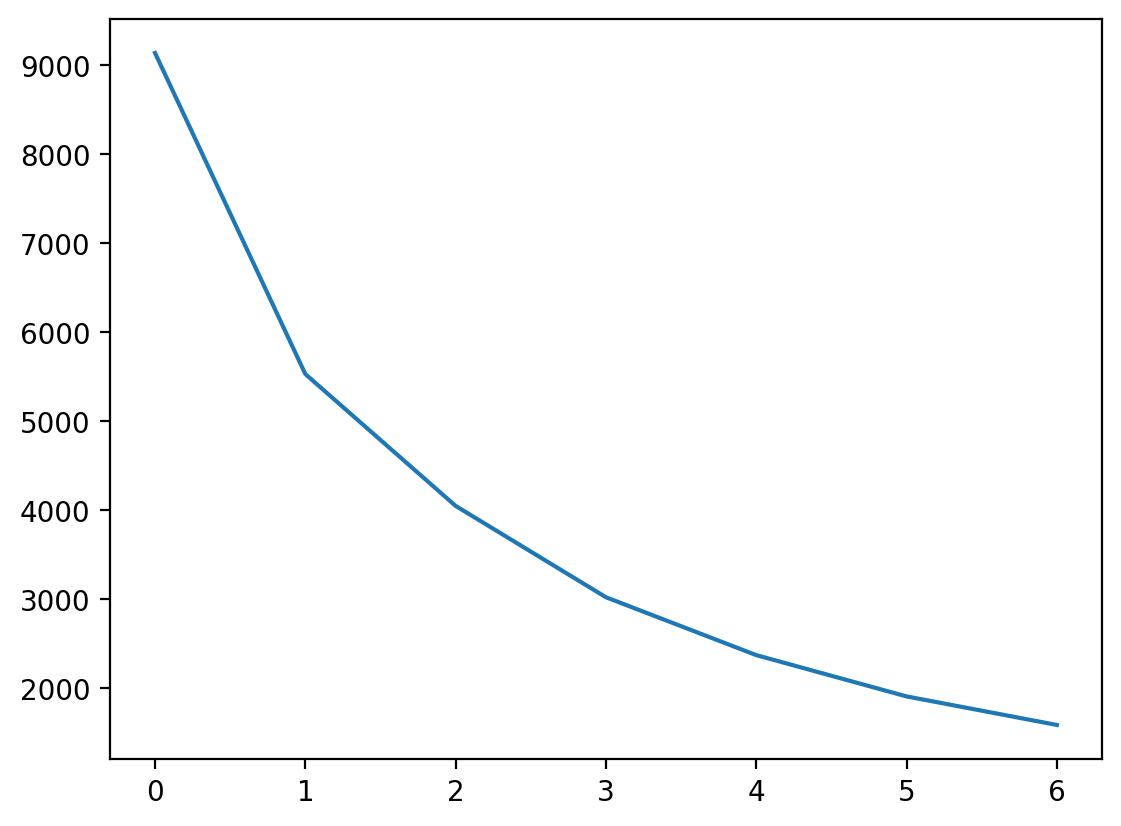

In [138]:
# elbow-curve
IntraCD= []
clusters = [2, 3, 4, 5, 6, 7, 8]
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=50)
    kmeans.fit(rmf_df_scaled)
    
    IntraCD.append(kmeans.inertia_)
    
# plot the IntraCD's(intra-cluster-distances) for each cluster
plt.plot(IntraCD)

## ♦ Observation:
<div class="alert alert-block alert-info">
    * <i>From the above plot at cluster index 1 we can observe an elbow i.e the sharp drop of curve is changed</i><br>
    * <i>Hence K = 3 are the best number of clusters for the data</i><br>

In [139]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rmf_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [140]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [141]:
# assign the label
rmf_df['cluster_id'] = kmeans.labels_
rmf_df.head()

,CustomerID,Monetary,Frequency,Recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,7,1,0
2,12348.0,1797.24,4,74,0
3,12349.0,1757.55,1,18,0
4,12350.0,334.40,1,309,2


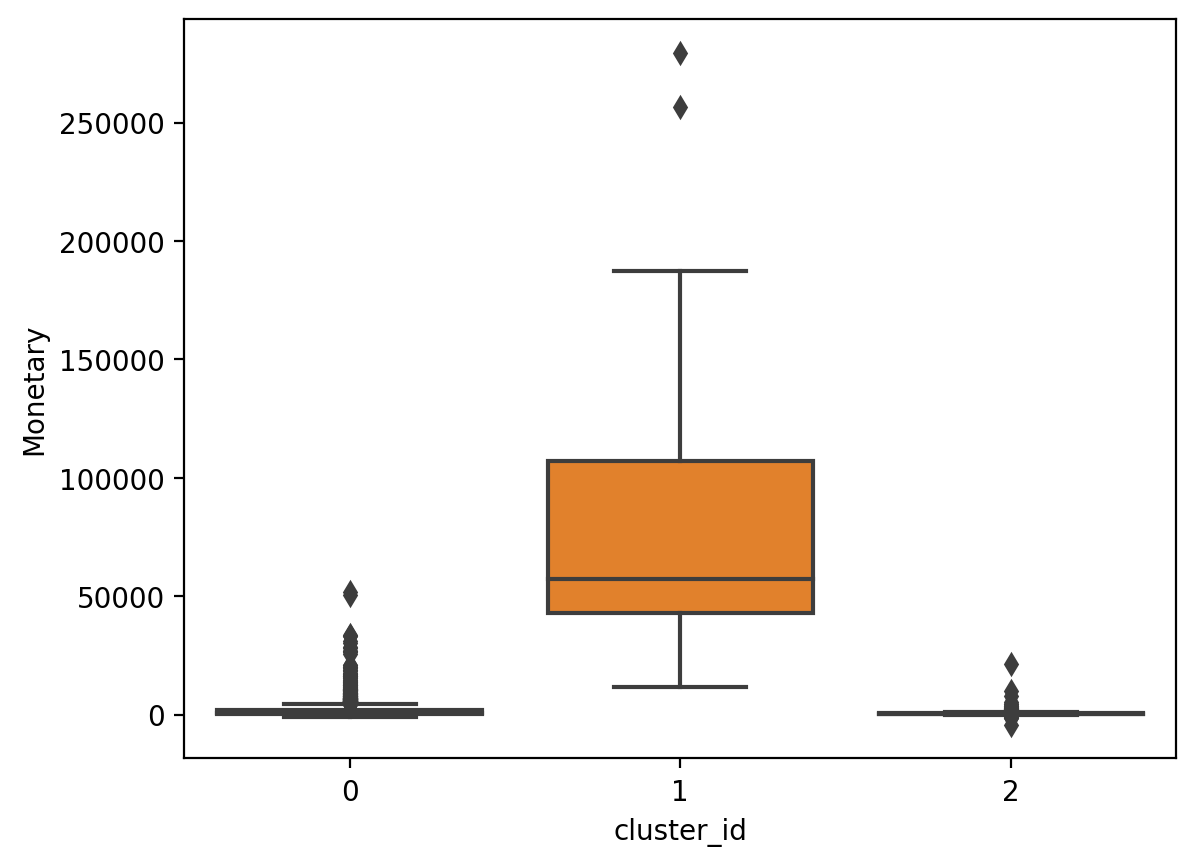

In [142]:
# plot 
sns.boxplot(x='cluster_id', y='Monetary', data=rmf_df);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i> Cluster <code>1</code> represents high Monetary customers.</i><br>
    * <i> Cluster <code>2</code> represents very least monetary customers</i><br>
    * <i> Cluster <code>0</code> represents low to moderate monetary customers</i><br>
    </div>

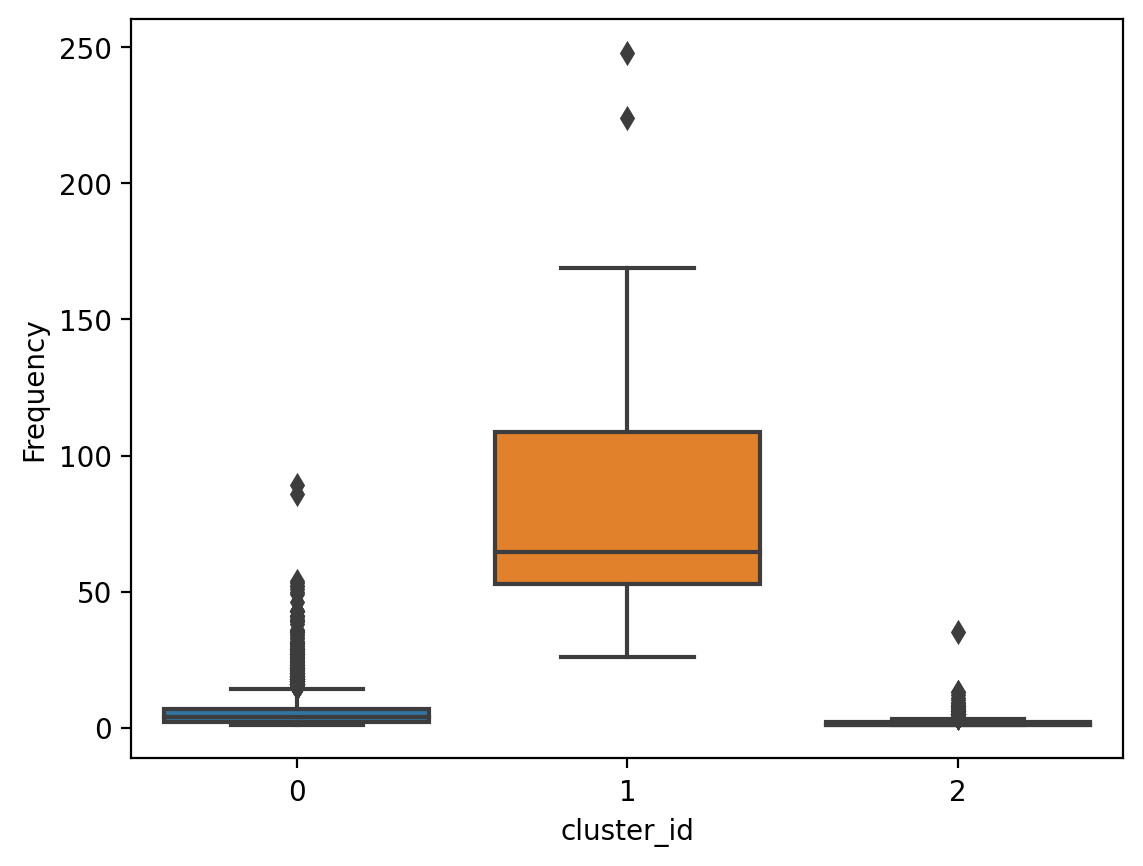

In [143]:
sns.boxplot(x='cluster_id', y='Frequency', data=rmf_df);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i> Cluster <code>1</code> represents high frequency customers.</i><br>
    * <i> Cluster <code>2</code> represents very least frequency customers</i><br>
    * <i> Cluster <code>0</code> represents moderate frequency customers</i><br>
    </div>

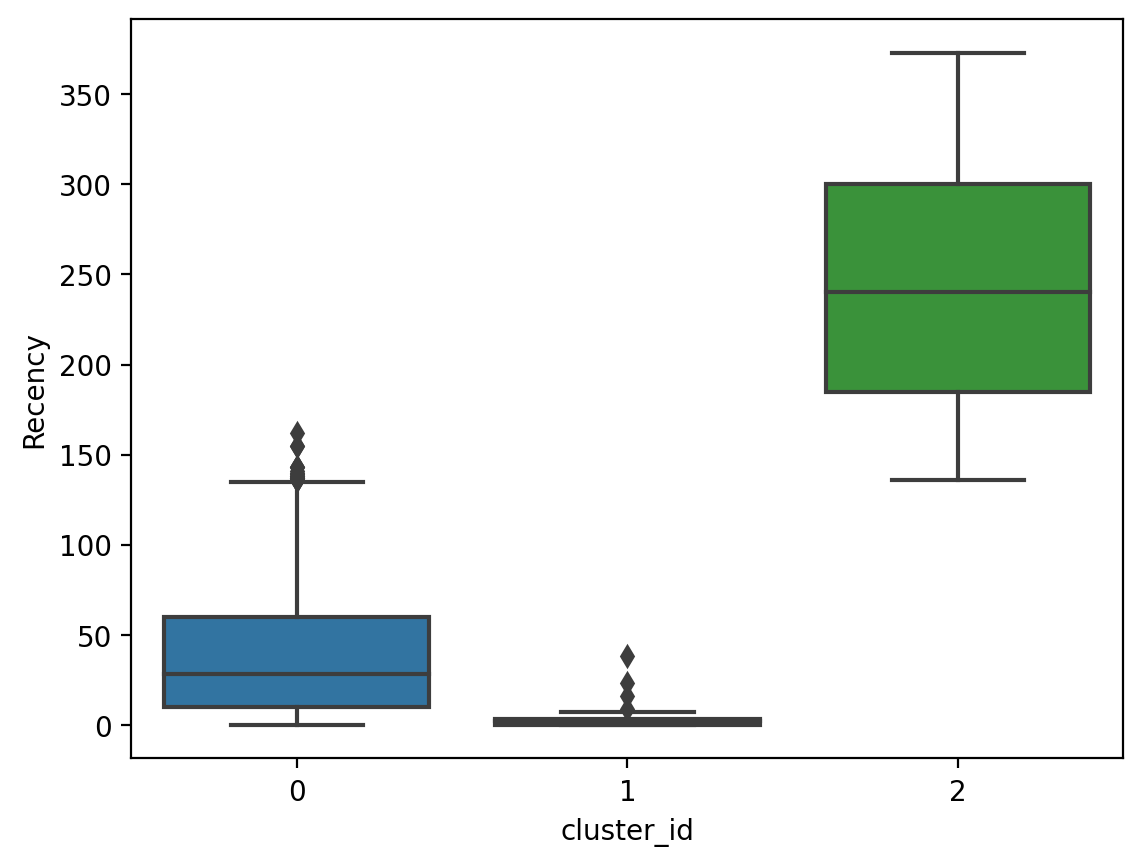

In [144]:
sns.boxplot(x='cluster_id', y='Recency', data=rmf_df);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i> Cluster <code>1</code> represents least recency customers.</i><br>
    * <i> Cluster <code>2</code> represents very high recency customers</i><br>
    * <i> Cluster <code>0</code> represents moderate recency customers</i><br>
    </div>

## ♦ Overall Observations
<div class="alert alert-block alert-info">
    * <i>From the above observations we were able to identify that cluster 1 customers are high frequent, monetary and Least Recency
         and cluster 2 customers are least monetary, least frequent, high recency and cluster 0 customers are low to moderate monetary, 
         moderate frequent, moderate recency.</i><br>
    * <i>The clusters can be more precise if we had done the Outlier detection and treatment.</i><br>

# Treating the Outliers

In [145]:
rmf_df.describe()

,CustomerID,Monetary,Frequency,Recency,cluster_id
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,5.075480,91.047118,0.512351
std,1722.390705,8219.345141,9.338754,100.765435,0.870253
min,12346.000000,-4287.630000,1.000000,0.000000,0.000000
25%,13812.750000,293.362500,1.000000,16.000000,0.000000
50%,15300.500000,648.075000,3.000000,49.000000,0.000000
75%,16778.250000,1611.725000,5.000000,142.000000,2.000000
max,18287.000000,279489.020000,248.000000,373.000000,2.000000


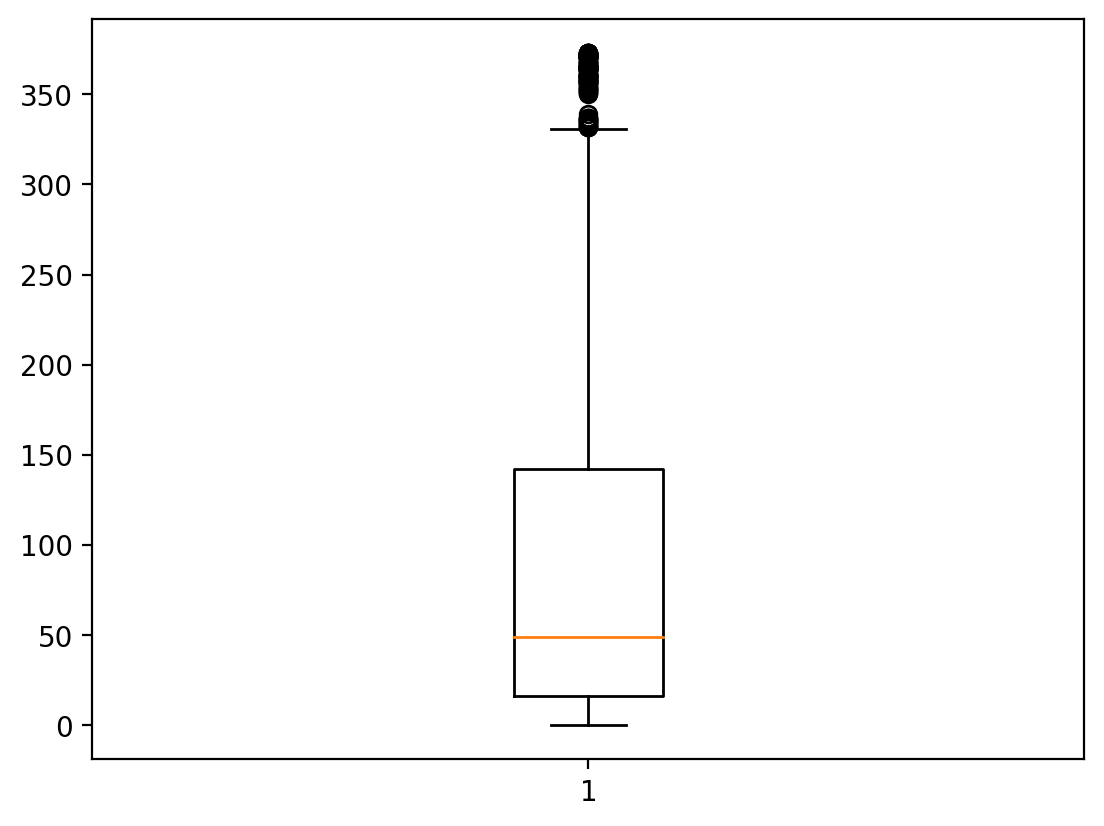

In [146]:
plt.boxplot(rmf_df['Recency']);

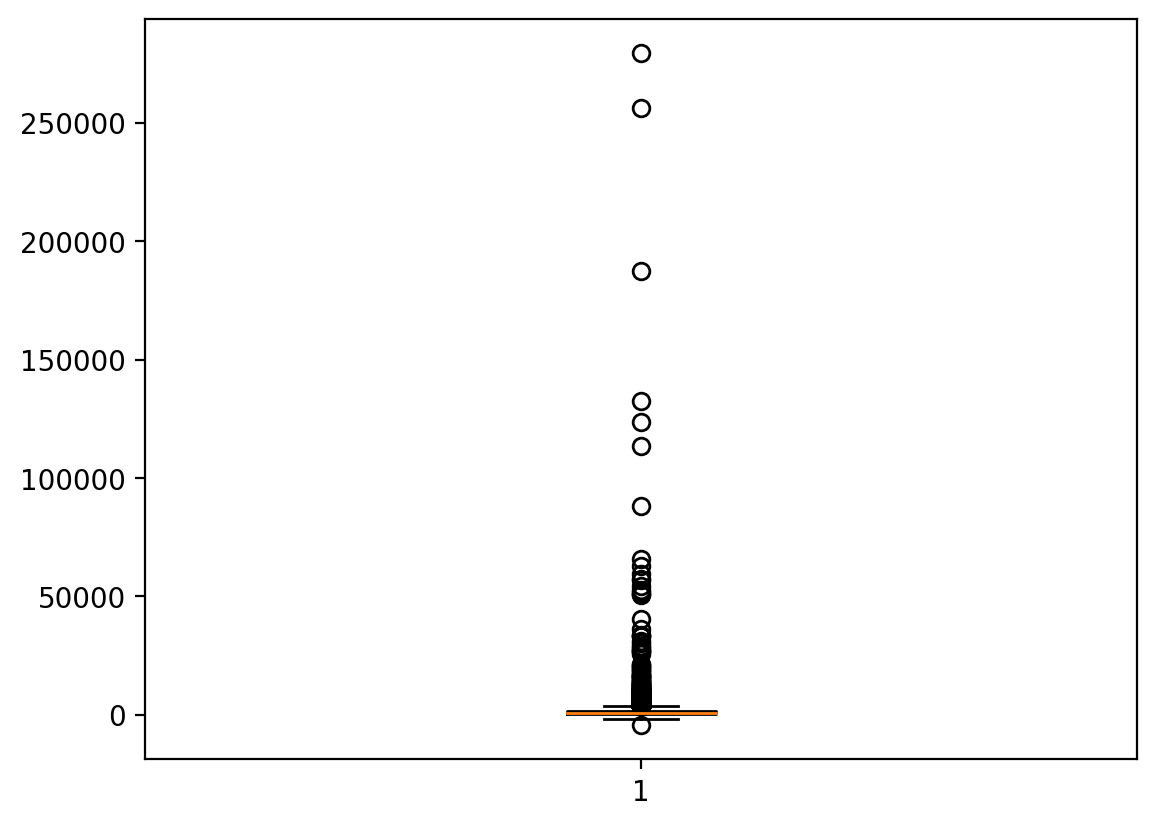

In [147]:
plt.boxplot(rmf_df['Monetary']);

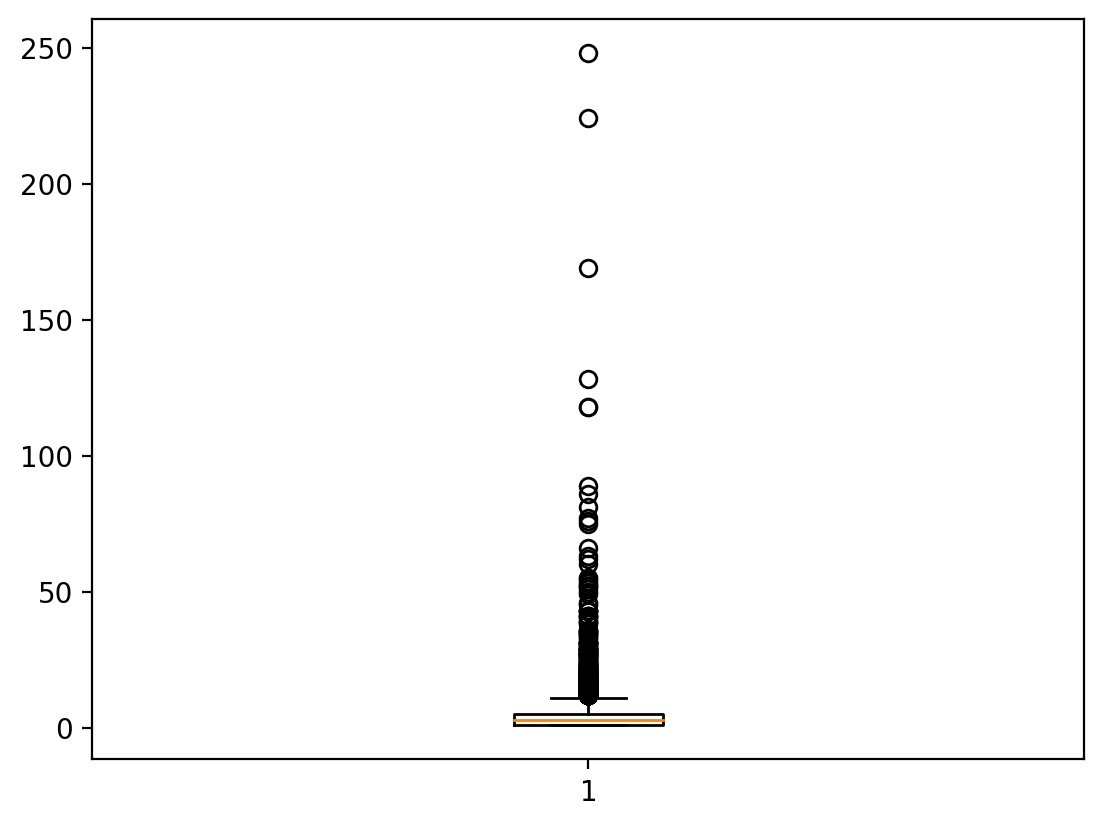

In [148]:
plt.boxplot(rmf_df['Frequency']);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i>We can observe that Monetary, Frequency and Recency features are having Outliers</i><br>
    </div>

In [149]:
# two types of outliers:
# - statistical
# - domain specific

In [150]:
Q1 = rmf_df.Monetary.quantile(0.15)
Q3 = rmf_df.Monetary.quantile(0.85)
IQR = Q3 - Q1
rmf_df = rmf_df[(rmf_df.Monetary >= Q1 - 1.5*IQR) & (rmf_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = rmf_df.Recency.quantile(0.15)
Q3 = rmf_df.Recency.quantile(0.85)
IQR = Q3 - Q1
rmf_df = rmf_df[(rmf_df.Recency >= Q1 - 1.5*IQR) & (rmf_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = rmf_df.Frequency.quantile(0.15)
Q3 = rmf_df.Frequency.quantile(0.85)
IQR = Q3 - Q1
rmf_df = rmf_df[(rmf_df.Frequency >= Q1 - 1.5*IQR) & (rmf_df.Frequency <= Q3 + 1.5*IQR)]

In [151]:
rmf_df.shape # The original shape was - 4372
print(4372-4057,'Outliers are removed')
rmf_df.columns

(4096, 5)

315 Outliers are removed


Index(['CustomerID', 'Monetary', 'Frequency', 'Recency', 'cluster_id'], dtype='object')

## Feature Transformation - Standardization

In [156]:
rmf_df1 = rmf_df[['Monetary', 'Frequency', 'Recency']]

In [157]:
# Object creation of the class
scaler1 = StandardScaler()

# Apply fit_transform
rmf_df_scaled = scaler1.fit_transform(rmf_df1)
rmf_df_scaled.shape

(4096, 3)

In [158]:
rmf_df_scaled = pd.DataFrame(rmf_df_scaled)
rmf_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rmf_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.922438,-0.496376,2.250163
1,3.072847,1.076057,-0.934760
2,0.743568,0.132597,-0.217170
3,0.706776,-0.810862,-0.767650
4,-0.612456,-0.810862,2.092882


## Model Building

In [159]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rmf_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [160]:
kmeans.labels_

array([1, 2, 0, ..., 0, 2, 0])

In [162]:
# assign the label
rmf_df['cluster_id'] = kmeans.labels_
rmf_df.head()
rmf_df.shape

,CustomerID,Monetary,Frequency,Recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,7,1,2
2,12348.0,1797.24,4,74,0
3,12349.0,1757.55,1,18,0
4,12350.0,334.40,1,309,1


(4096, 5)

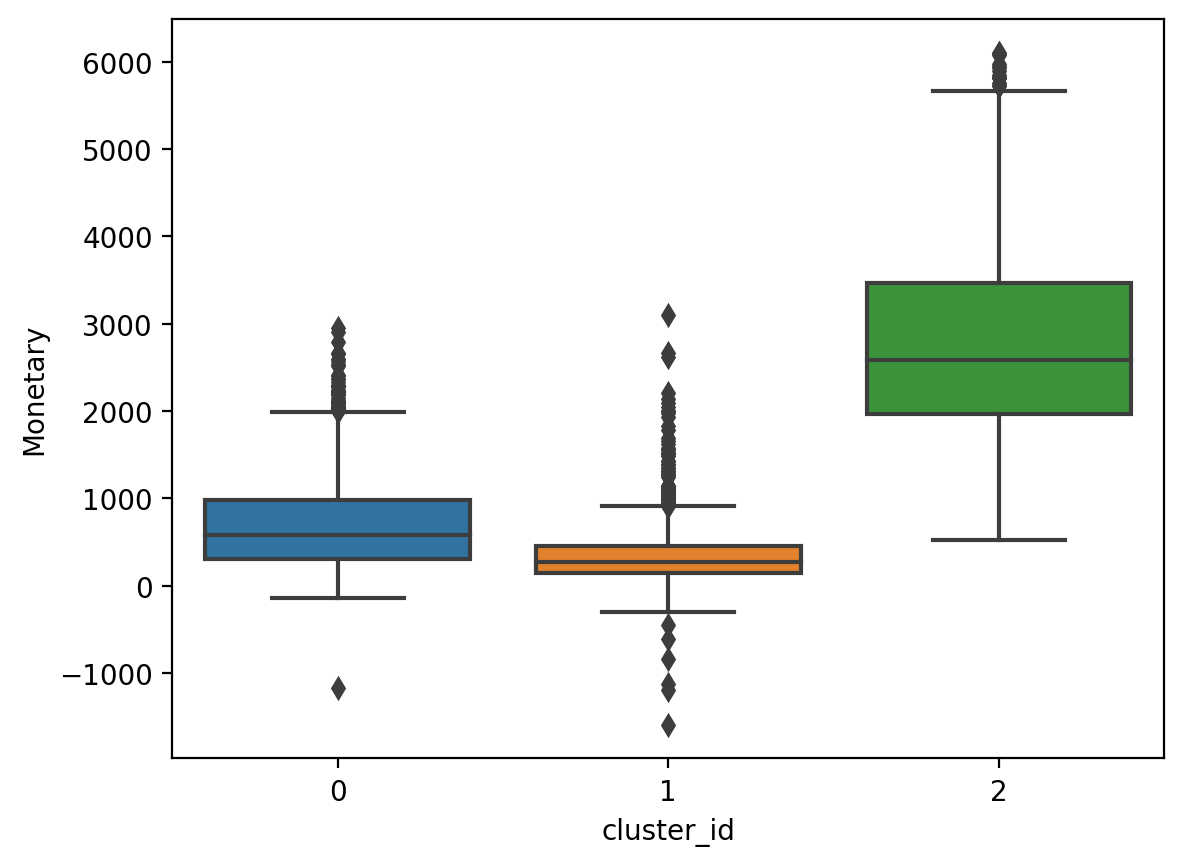

In [163]:
# plot 
sns.boxplot(x='cluster_id', y='Monetary', data=rmf_df);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i> Cluster <code>2</code> represents high Monetary customers.</i><br>
    * <i> Cluster <code>0</code> represents  moderate monetary customers</i><br>
    * <i> Cluster <code>1</code> represents low monetary customers</i><br>
    </div>

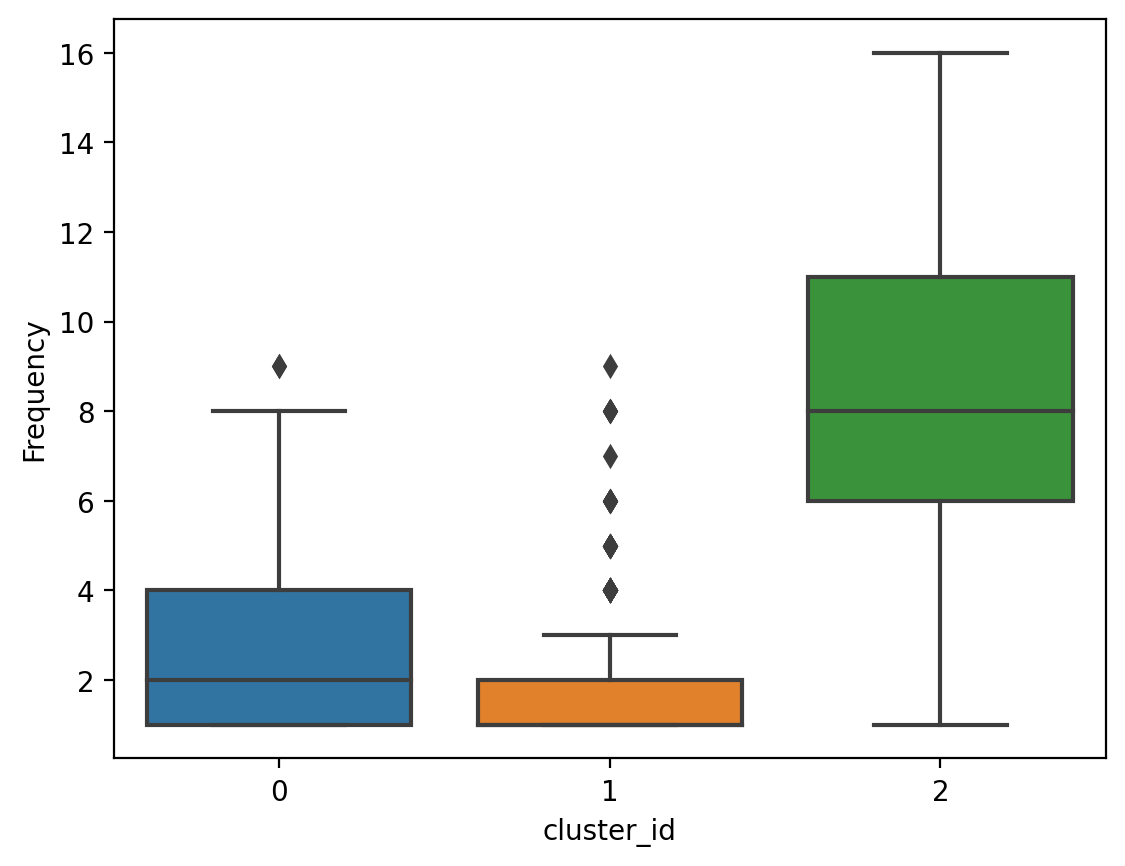

In [164]:
sns.boxplot(x='cluster_id', y='Frequency', data=rmf_df);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i> Cluster <code>2</code> represents high Frequency customers.</i><br>
    * <i> Cluster <code>1</code> represents least Frequency customers</i><br>
    * <i> Cluster <code>0</code> represents moderate Frequency customers</i><br>
    </div>

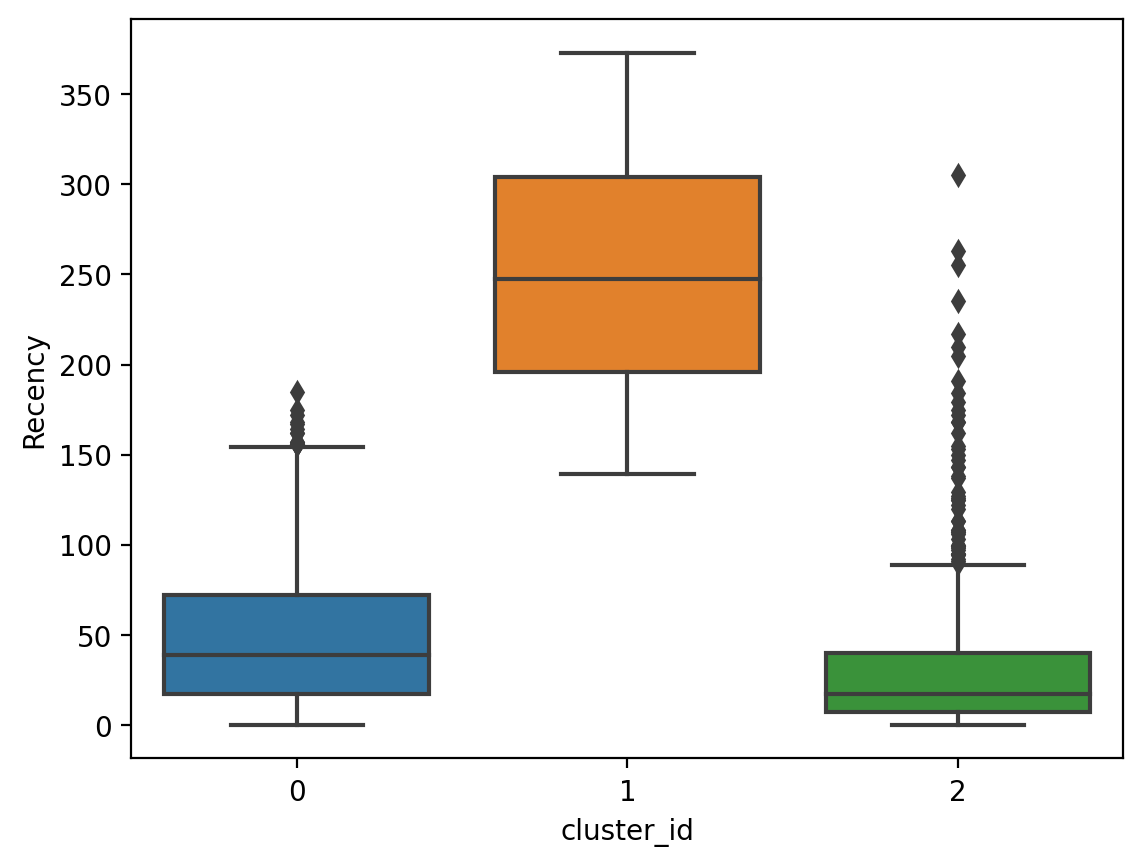

In [165]:
sns.boxplot(x='cluster_id', y='Recency', data=rmf_df);

## ♦ Important Observations
<div class="alert alert-block alert-info">
    * <i> Cluster <code>2</code> represents Least Recency customers.</i><br>
    * <i> Cluster <code>1</code> represents very High Recency customers</i><br>
    * <i> Cluster <code>0</code> represents moderate Recency customers</i><br>
    </div>

## ♦ Final Overall Observations
<div class="alert alert-block alert-info">
    * <i>From the above observations we were able to identify that cluster 2 customers are high frequent, monetary and low Recency
         and cluster 1 customers are least monetary, least frequent, high recency and cluster 0 customers are low to moderate monetary, 
         moderate frequent, moderate recency</i><br>
    * <i>We were able to get the best clusters that are clearly identifies the customers behaviour</i><br>

# End Of Project